<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/VLCmulti_levels_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#data = pd.read_excel('data_5.xlsx')
data = pd.read_csv('data_5.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524288 entries, 0 to 524287
Data columns (total 2 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Samples - Analog Ch AIN3A      524288 non-null  int64  
 1   Voltage (V) - Analog Ch AIN3A  524288 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.0 MB


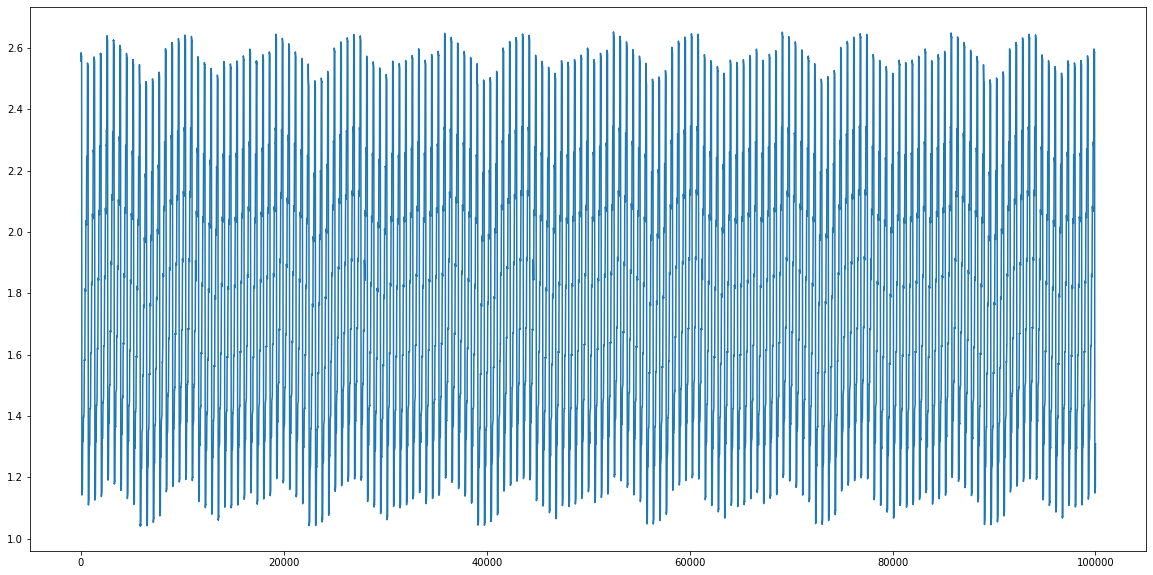

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(data['Voltage (V) - Analog Ch AIN3A'][0:100000])

In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
volt_df=pd.DataFrame(data,
            columns=['Voltage (V) - Analog Ch AIN3A'])
#volt_df = data['Voltage (V) - Analog Ch AIN3A']
volt_norm = scaler.fit_transform(np.array(volt_df).reshape(-1,1))

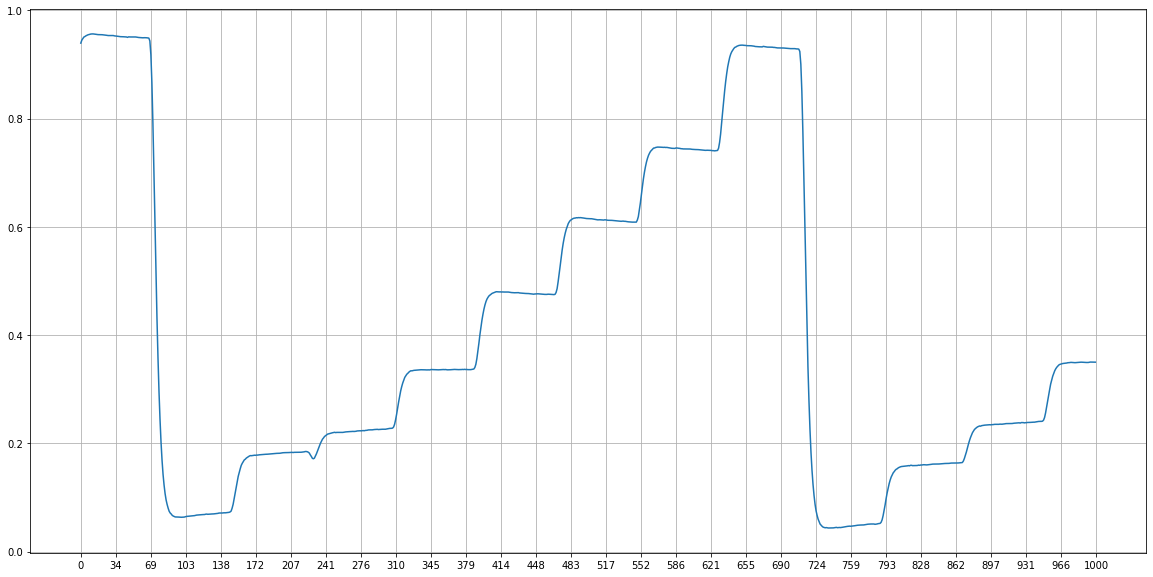

In [6]:
plt.figure(figsize=(20,10))
L1, L2 = 0, 1000
plt.plot(volt_norm[L1:L2])
plt.xticks( np.linspace(0, L2-L1, 30) )
plt.grid()

(array([30023., 29642., 28493., 48250., 29088., 30095., 29306., 30027.]),
 array([0.   , 0.12 , 0.205, 0.28 , 0.485, 0.61 , 0.725, 0.875, 1.   ]),
 <a list of 8 Patch objects>)

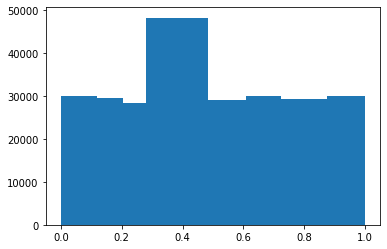

In [ ]:
plt.hist(volt_norm, bins=[0. , 0.12, 0.205 , 0.28, 0.485  , 0.61, 0.725 , 0.875, 1.])

(array([31558., 48400., 36827., 27291., 28332., 30231., 22258., 30027.]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 <a list of 8 Patch objects>)

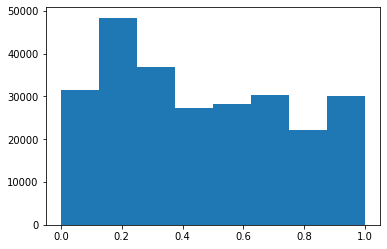

In [ ]:
plt.hist(volt_norm, bins=8)

FFT analysis

In [ ]:
from scipy.fftpack import fft, ifft, fftshift
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft

plt.style.use('seaborn-poster')
%matplotlib inline

fs=1e6
len=10240     
NFFT=1024 #NFFT-point DFT      
x = volt_norm[0:len]
#X=fft(x,NFFT) #compute DFT using FFT    

# # fig1, ax = plt.subplots(nrows=1, ncols=1) #create figure handle
# # nVals = np.arange(start = 0,stop = NFFT) # raw index for FFT plot
# # ax.plot(nVals,np.abs(X))      
# # ax.set_title('Double Sided FFT - without FFTShift')
# # ax.set_xlabel('Sample points (N-point DFT)')        
# # ax.set_ylabel('DFT Values')
# # fig1.show()
# # Moisture_mean_x = pd.read_excel("signal.xlsx", header = None)
# # Moisture_mean_x = pd.rolling_mean(Moisture_mean_x, 10) # doesn't helps
# # Moisture_mean_x = Moisture_mean_x.dropna()
# # Moisture_mean_x = Moisture_mean_x -Moisture_mean_x.mean()
# frate = fs #/sec           
# Hn = fft.fft(x)

# freqs = fft.fftfreq(len(Hn), 1/frate)
# idx = np.argmax(np.abs(Hn))
# freq_in_hertz = freqs[idx]

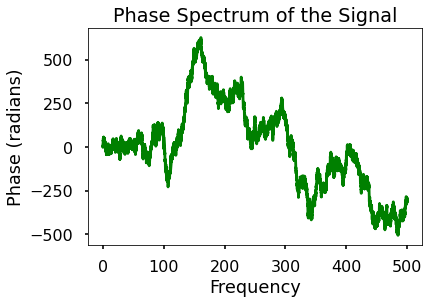

In [ ]:
import numpy
from matplotlib import pyplot 
   
# assigning time values of the signal
# initial time period, final time period and phase angle
#signalTime = numpy.arange(5, 10, 0.25);
  
# getting the amplitude of the signal
#signalAmplitude = numpy.sin(signalTime)
  
Fs = 1
  
x = volt_norm[0:100000].reshape(-1,)
# plotting the phase spectrum of the signal 
pyplot.phase_spectrum(x, Fs=1e3,  color ='green')
  
pyplot.title("Phase Spectrum of the Signal")
pyplot.show()

### Frequency Analysis

In [7]:
from scipy import pi
from scipy.fftpack import fft,fftfreq


sample_rate = 1e6
# Time in second
t = np.rint(np.shape(volt_df)[0]/(sample_rate))
#t = np.shape(volt_df)[0]
# Length of data
M = int((t - 0) * sample_rate)
#N = np.shape(volt_norm)[0]

In [8]:
np.shape(volt_df)[0]/(sample_rate)

0.524288

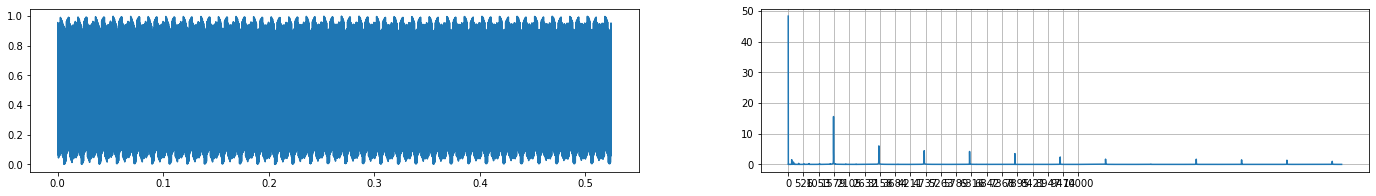

In [10]:
# Number of sample points
N = np.shape(volt_df)[0]
fs = 1e6
# sample spacing
T = 1.0 / fs
y = volt_norm[0:M].reshape(-1,)

x = np.linspace(0.0, N*T, N, endpoint=False)
y = volt_norm.reshape(-1,)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(24,3))

plt.subplot(1,2,1)
plt.plot (x,y)

plt.subplot(1,2,2)
L1, L2 = 0, 10000
plt.plot(xf[L1:L2], 2.0/(L2-L1) * np.abs(yf[L1:L2]))
plt.xticks( np.linspace(L1, L2, 20) )
#plt.yscale('log')
plt.grid()

## Check Frequency of the signal

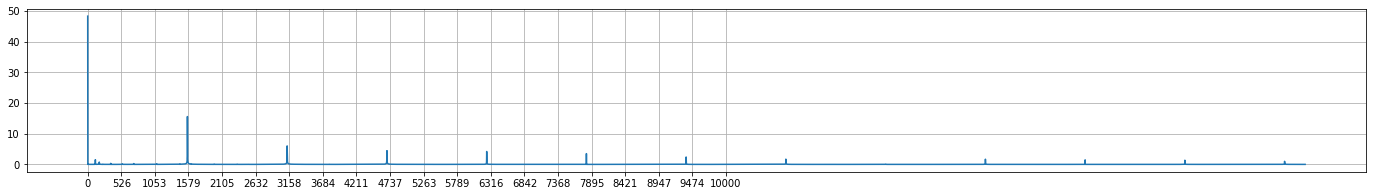

In [11]:
plt.figure(figsize=(24,3))
L1, L2 = 0, 10000
plt.plot(xf[L1:L2], 2.0/(L2-L1) * np.abs(yf[L1:L2]))
plt.xticks( np.linspace(L1, L2, 20) )
#plt.yscale('log')
plt.grid()

In [12]:
from scipy.signal import savgol_filter
X = volt_norm.reshape(-1,)
filter_VLC = savgol_filter(X, window_length = 511, polyorder =1)
filter_VLC = savgol_filter(filter_VLC, window_length = 1821, polyorder =3) #1511

bwrVLC =  X - filter_VLC

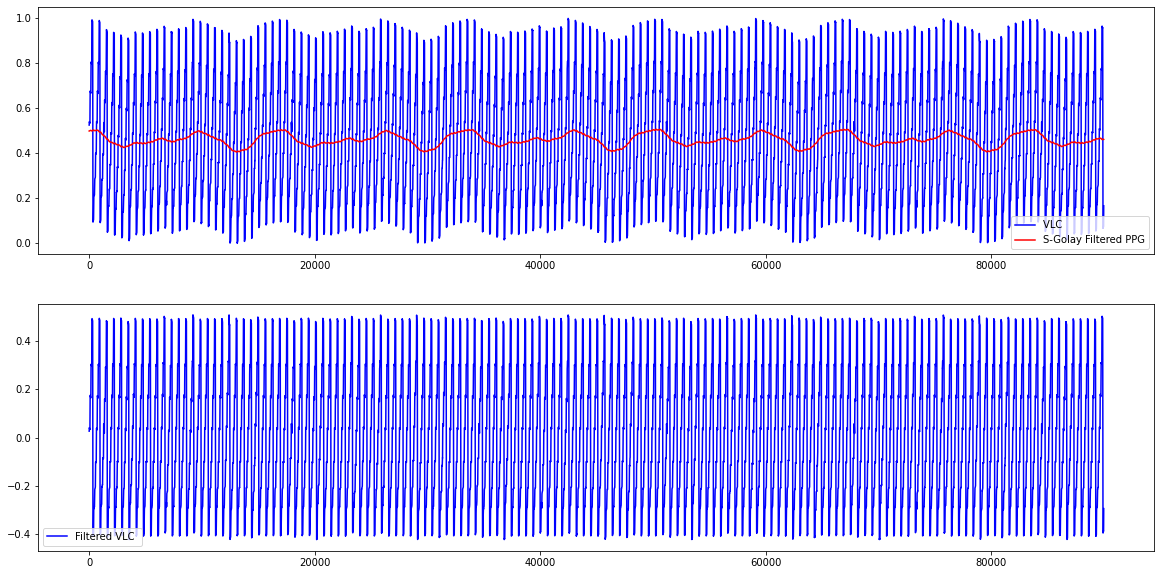

In [13]:


plt.subplots(2, 1, figsize=(20,10))
L1, L2 = 10000, 100000
#L1, L2 = 0, len(bwrPPG1)
#plt.subplot(3, 1, 1)
plt.subplot(2, 1, 1)
plt.plot(X[L1:L2], "b-", label="VLC " )
plt.plot(filter_VLC[L1:L2], "r-", label="S-Golay Filtered PPG")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(bwrVLC[L1:L2], "b-", label="Filtered VLC " )
plt.legend()

### Remove the baseline

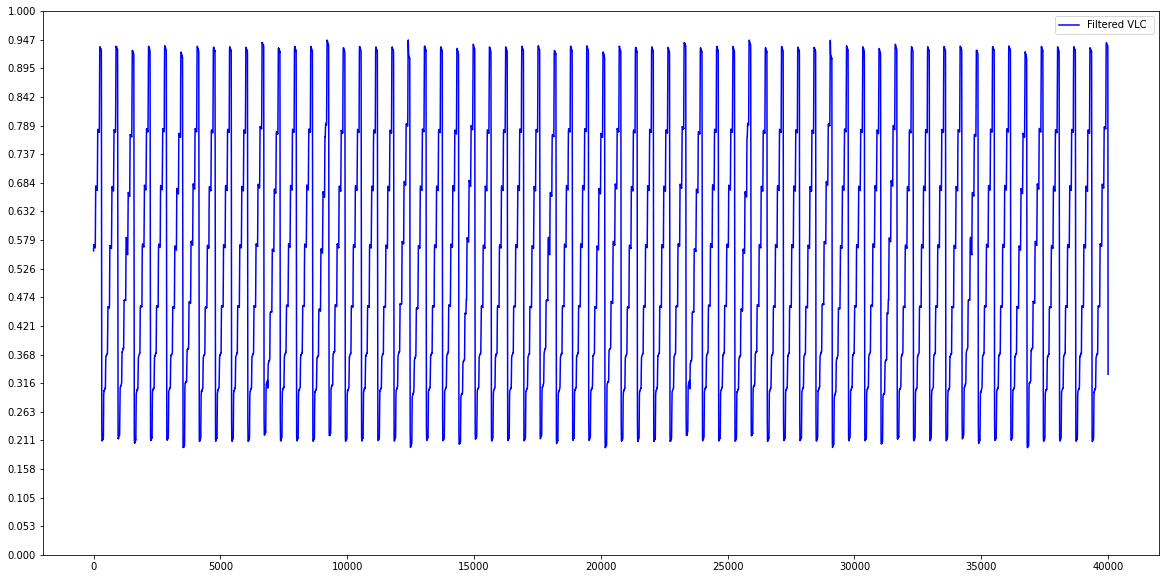

In [14]:
bwrVLC_norm = scaler.fit_transform(np.array(bwrVLC).reshape(-1,1))

plt.figure( figsize=(20,10))
L1, L2 = 10000, 50000
plt.plot(bwrVLC_norm[L1:L2], "b-", label="Filtered VLC " )
plt.yticks( np.linspace(0, 1, 20) ) 
plt.legend()

(array([27439., 32226., 28493., 27655., 36611., 38544., 32647., 31309.]),
 array([0.   , 0.105, 0.205, 0.28 , 0.37 , 0.526, 0.679, 0.83 , 1.   ]),
 <a list of 8 Patch objects>)

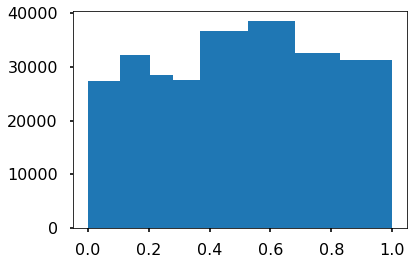

In [ ]:
plt.hist(volt_norm, bins=[0 , 0.105, 0.205 , 0.28, 0.37, 0.526  , 0.679, 0.83, 1])

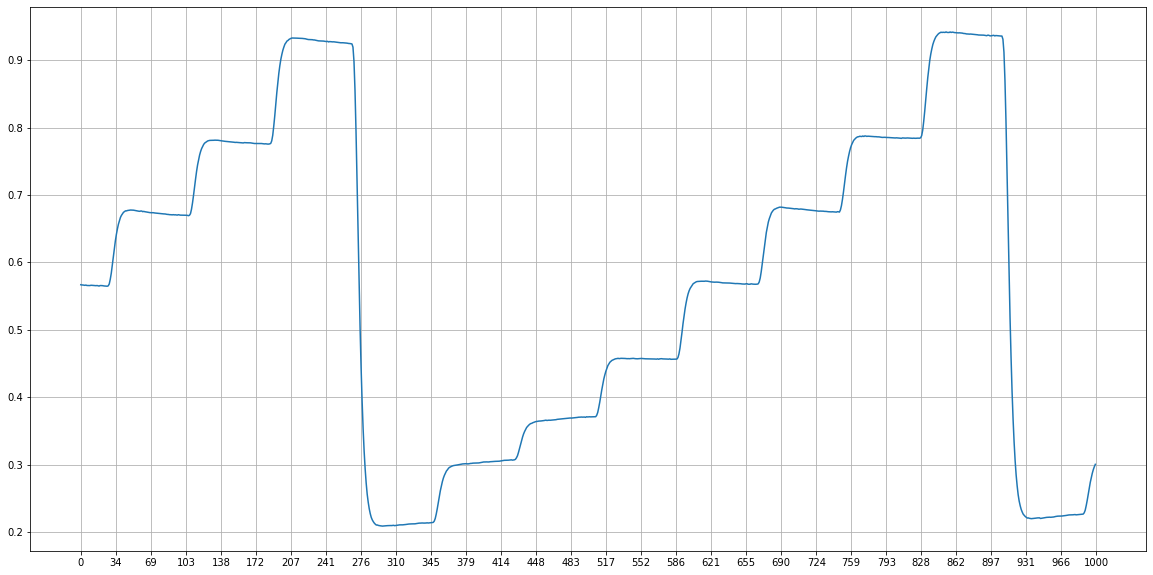

In [15]:
plt.figure(figsize=(20,10))
L1, L2 = 100000 - 1000, 100000
plt.plot(bwrVLC_norm[L1:L2])
plt.xticks( np.linspace(0, L2-L1, 30) )
plt.grid()

In [16]:
def segment_data(signal, distance, overlap):
  # distance: the window length in samples
  # the overlap of each segment in samples
 ### ***Careful for the ndarray or array ****
#  seg = [x for x in range(1, len(signal),distance - overlap)];
  seg = [x for x in range(0, np.shape(signal)[0],distance - overlap)];
  s = list()
  for i in seg:
    if i + distance < np.shape(signal)[0]: 
      a = signal[i:i+distance];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
      s.append(a)
    
    
  return np.asarray(s) # return a nd array

In [17]:
s = segment_data(bwrVLC_norm[1280:-240], 80, 0)

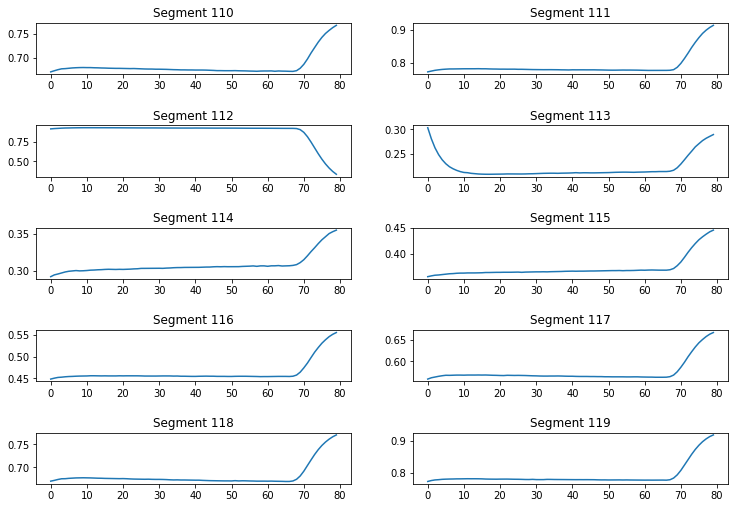

In [18]:
plt.subplots(5,2, figsize=(12,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=1)
k = 110
for i in range(k,10+k):
  plt.subplot(5,2,i-k+1)
  plt.plot(s[i])
  plt.title(f'Segment {i}')

In [19]:
for i in range(10):
  print(np.median(s[i+100]))

0.45669962770129613
0.5675651712654983
0.6743969449779061
0.77955508440896
0.929666933899052
0.21393165500935377
0.30516028032973935
0.369020485015162
0.4563556296919339
0.5676740957381095


In [20]:
np.shape(s)

(6534, 80, 1)

### Group data based on median

In [21]:

A,B,C,D,E,F,G,H = [],[],[],[],[],[],[],[]

for i in range(np.shape(s)[0]):
  a = i%8
  m = np.median(s[i])
  if a==0:
    A.append(m)
  elif a==1:
    B.append(m)
  elif a ==2:
    C.append(m)
  elif a ==3:
    D.append(m)
  elif a ==4:
    E.append(m)
  elif a ==5:
    F.append(m)  
  elif a ==6:
    G.append(m)
  else:
    H.append(m)    
  

In [22]:
N = min(np.shape(A)[0], np.shape(B)[0],np.shape(C)[0],np.shape(D)[0],np.shape(E)[0],np.shape(F)[0],np.shape(G)[0],np.shape(H)[0])

In [23]:
data = [A, B, C, D, E, F, G, H]
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
df0 = [pd.DataFrame(x) for x in data]

df = pd.concat(df0, ignore_index=True, axis=1 )
df.columns =labels

In [24]:
df.head()

,A,B,C,D,E,F,G,H
0,0.930467,0.214765,0.306356,0.368127,0.456975,0.568292,0.675472,0.780655
1,0.930187,0.214208,0.303468,0.363271,0.450174,0.558865,0.663371,0.791490
2,0.941112,0.222747,0.311581,0.371292,0.458263,0.568119,0.672968,0.778187
3,0.927638,0.213770,0.304971,0.367237,0.456264,0.567800,0.674861,0.779801
4,0.930226,0.214468,0.305771,0.367937,0.456650,0.567780,0.673652,0.779082


In [ ]:
# data = [A, B, C, D, E, F, G, H]
# df = [pd.DataFrame(x) for x in data]
# df = pd.DataFrame()
# labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
# for i in range(np.shape(labels)[0]):
#   df[labels[i]] = data[i]

In [25]:
df.describe()

,A,B,C,D,E,F,G,H
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,816.000000,816.000000
mean,0.929368,0.213332,0.305394,0.368647,0.457309,0.568063,0.674303,0.780538
std,0.004745,0.004504,0.004273,0.004551,0.004379,0.004328,0.004446,0.004566
min,0.915959,0.199527,0.294539,0.356188,0.444563,0.554940,0.662639,0.770557
25%,0.928611,0.212460,0.304138,0.368234,0.455864,0.567048,0.673671,0.778835
50%,0.929618,0.213530,0.305072,0.368894,0.456966,0.568018,0.674445,0.779924
75%,0.930548,0.214160,0.305880,0.369781,0.457909,0.569056,0.675674,0.780997
max,0.946290,0.229627,0.318049,0.379687,0.469681,0.581488,0.687587,0.795950


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


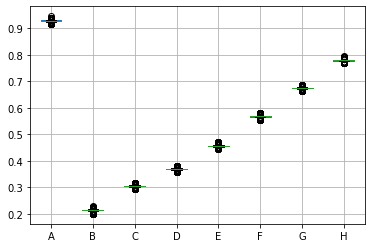

In [26]:
import matplotlib.pyplot as plt
# Boxpolot for the Data
df.boxplot()

# Labelling the segment 

In [28]:
def check_range(x, ran):
  if x >= ran[0] and x <= ran[1]:
    return 1
  else: 
    return 0
 

In [29]:
## make the label for the list of segment data 
X = []
y = []
rans = []
for label in labels:
  #extract min and max to each group in dataframe
  rans.append(df.describe()[label][['min','max']].values)

for seg in s:
  #flag = 0;
  for i in range(np.shape(labels)[0]):
    if (check_range(np.median(seg), rans[i])):
      y.append(labels[i])
      X.append(seg.reshape(-1))
      #flag = 1
  # if flag==0:
  #   y.append('NA')

In [ ]:
rans

[array([0.91595926, 0.94629015]),
 array([0.19952711, 0.22962654]),
 array([0.29453878, 0.31804885]),
 array([0.35618801, 0.37968695]),
 array([0.44456271, 0.46968115]),
 array([0.55494039, 0.58148823]),
 array([0.66263922, 0.68758711]),
 array([0.77055696, 0.79594998])]

In [30]:
np.shape(X[0]), np.shape(X)

((80,), (6534, 80))

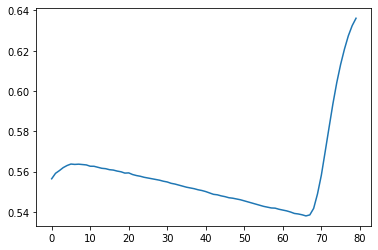

In [31]:
plt.plot(X[6533])

In [34]:
X = np.asarray(X)

In [35]:
X.shape

(6534, 80)

In [ ]:
X[1]

### Check miss values in Y

In [37]:
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(np.shape(xs)[0])) if x == y]
print(get_indexes('NA',y))

[]


### Multi-perceptron models

### Preparing Data

In [38]:
my_list = list(df)

In [39]:
my_list

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [ ]:
# X, y = [], []
# for label in my_list:
#   for value in df[label].dropna().values:
#     X.append(value)
#     y.append(label)

### Encoder the label

* y is label and need to convert to number by using LabelEncoder

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
y[0:10],y_encoded[0:10], np.shape(y_encoded), np.shape(X)

(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'A', 'B'], array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [0],
        [1]]), (6534, 1), (6534, 80))

In [41]:
y_encoded = y_encoded.reshape(-1,1)

In [42]:
y_encoded.shape

(6534, 1)

In [44]:
### 
import tensorflow as tf
import numpy as np
import keras


from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size= 0.2, random_state= 123)

In [45]:
y_train = to_categorical(y_train, 8)
y_test = to_categorical(y_test,8)

In [ ]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))


In [49]:
input_size = X_train.shape[1]
X_train = np.reshape(X_train, [-1, input_size])
X_test = np.reshape(X_test, [-1, input_size])

### Build the Model

In [47]:
np.shape(X_train), np.shape(X_test)

((5227, 80), (1307, 80))

In [48]:
X_train.shape[1]

80

In [52]:
model = Sequential()
#model.add(Dense(10, input_shape=(X_train.shape[1],X_train.shape[2] ), activation ='relu'))
model.add(Dense(10, input_dim=input_size, activation ='relu'))
#model.add(Flatten())
model.add(Dense(8, activation= 'softmax'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                810       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
Total params: 898
Trainable params: 898
Non-trainable params: 0
_________________________________________________________________


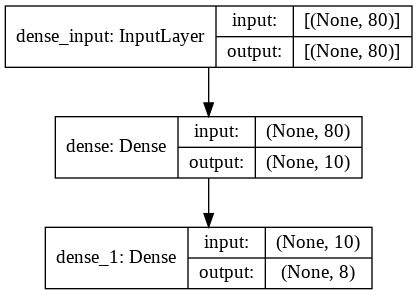

In [57]:
from keras.utils.vis_utils import plot_model
model.summary()
plot_model(model, to_file='generator_model_plot.png', show_shapes=True, show_layer_names=True)

In [54]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/100
66/66 [==============================] - 1s 5ms/step - loss: 2.0264 - accuracy: 0.1313 - val_loss: 1.9555 - val_accuracy: 0.2620
Epoch 2/100
66/66 [==============================] - 0s 2ms/step - loss: 1.9295 - accuracy: 0.2074 - val_loss: 1.8918 - val_accuracy: 0.2562
Epoch 3/100
66/66 [==============================] - 0s 2ms/step - loss: 1.8571 - accuracy: 0.2141 - val_loss: 1.8227 - val_accuracy: 0.2591
Epoch 4/100
66/66 [==============================] - 0s 2ms/step - loss: 1.7929 - accuracy: 0.2437 - val_loss: 1.7606 - val_accuracy: 0.2620
Epoch 5/100
66/66 [==============================] - 0s 2ms/step - loss: 1.7370 - accuracy: 0.2502 - val_loss: 1.7080 - val_accuracy: 0.2620
Epoch 6/100
66/66 [==============================] - 0s 2ms/step - loss: 1.6867 - accuracy: 0.2499 - val_loss: 1.6566 - val_accuracy: 0.2620
Epoch 7/100
66/66 [==============================] - 0s 2ms/step - loss: 1.6385 - accuracy: 0.2502 - val_loss: 1.6073 - val_accuracy: 0.2620
Epoch 8/100
6

### PLOT TRAINING AND LOSS 

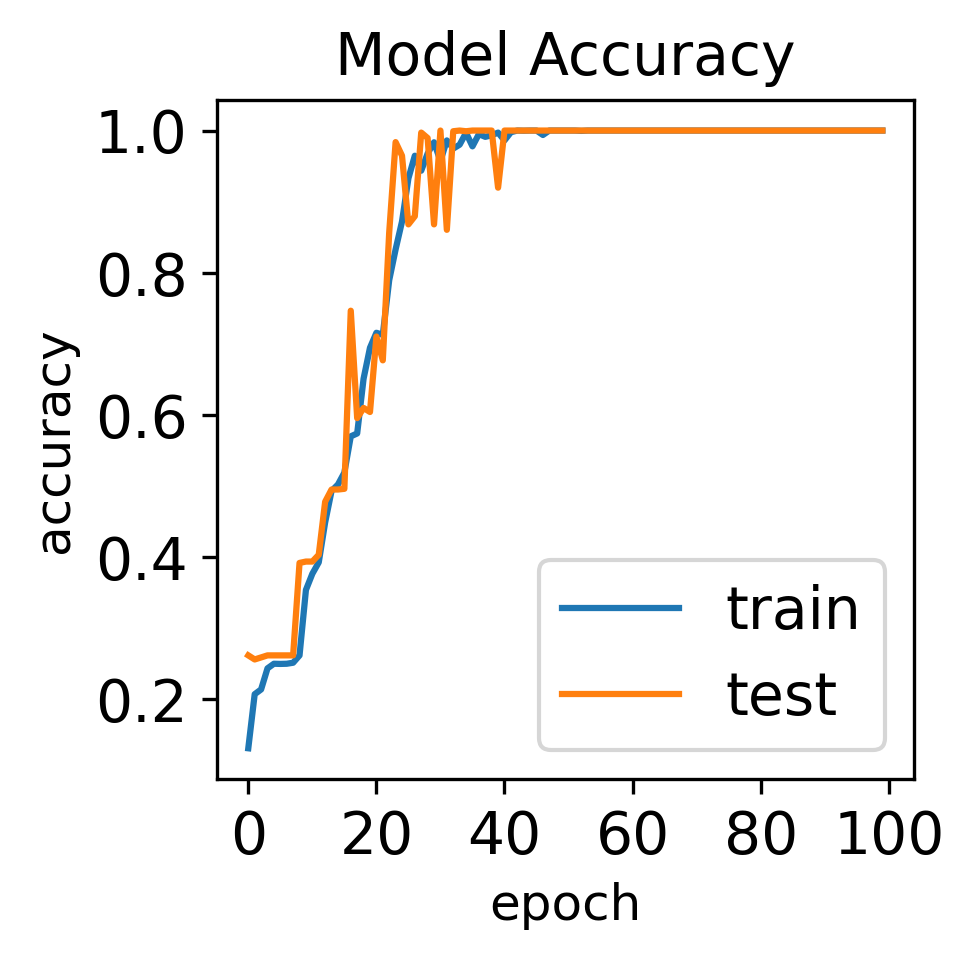

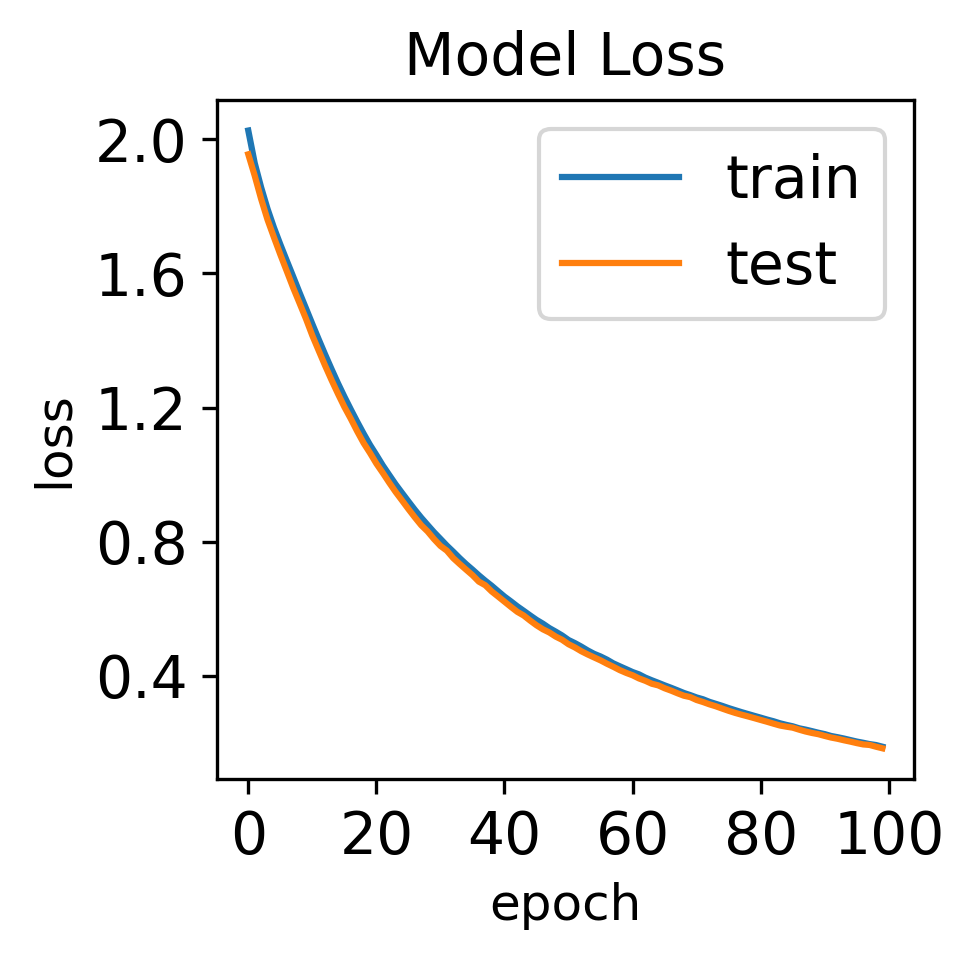

In [58]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
#plt.rcParams.update({'font.size': 22})
SMALL_SIZE = 14
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig = plt.figure(figsize=(3,3),dpi=300)
ax = fig.add_subplot(111)
#ax.yaxis.set_major_locator(MaxNLocator(5)) 
ax.xaxis.set_major_locator(MaxNLocator(6))
# summarize history for accuracy
ax.plot(history.history['accuracy'],'-')
ax.plot(history.history['val_accuracy'],'-')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
ax.legend(['train', 'test'], loc='lower right')
plt.show()

fig = plt.figure(figsize=(3,3),dpi=300)
ax = fig.add_subplot(111)
# summarize history for loss
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.yaxis.set_major_locator(MaxNLocator(6)) 
ax.xaxis.set_major_locator(MaxNLocator(6))
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ax.legend(['train', 'test'], loc='upper right')
plt.show()

### Confuse Matrix

### Predict values from test set

In [59]:
y_pred= np.round(np.clip(model.predict(X_test), 0, 1))

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00       179
           3       1.00      1.00      1.00       158
           4       1.00      1.00      1.00       171
           5       1.00      1.00      1.00       150
           6       1.00      1.00      1.00       142
           7       1.00      1.00      1.00       162

   micro avg       1.00      1.00      1.00      1307
   macro avg       1.00      1.00      1.00      1307
weighted avg       1.00      1.00      1.00      1307
 samples avg       1.00      1.00      1.00      1307



In [61]:
y_pred[0:10]

array([[0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

### Convert back to the y value from categories

In [62]:
yback = np.argmax(y_pred, axis=-1)
ybktest = np.argmax(y_test, axis=-1)

In [63]:
yback[0], ybktest[0]

(4, 4)

<Figure size 3600x2400 with 0 Axes>

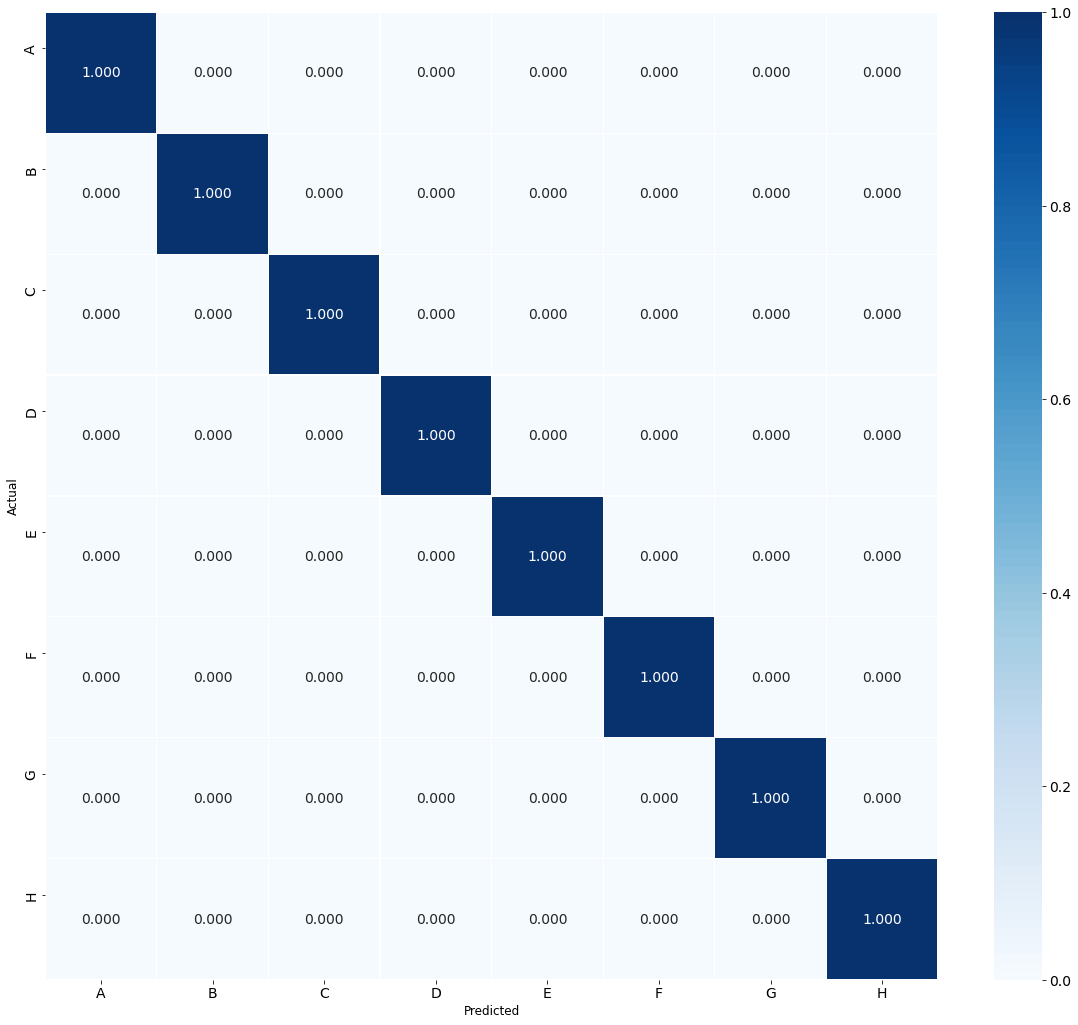

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
#cm = [[0.98868458, 0.00708215, 0.00500835],
#       [0.00565771, 0.99008499, 0.00500835],
#       [0.01697313, 0.00424929, 0.97495826]];
cm = confusion_matrix(yback, ybktest)
tick_marks = np.arange(np.shape(labels)[0])
# Normalise
colormap = sns.color_palette("Blues", 110) 
class_names = labels#['noise', 'in-phase', 'invert-phase']
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(dpi=600)
#fig = plt.figure(figsize=(18,15),dpi=1200)
fig, ax = plt.subplots(figsize=(20,17.8))
#f, (ax, cbar_ax) = plt.subplots(1,2, figsize=(18,15), gridspec_kw={'wspace':0.05, 'width_ratios':(0.8,0.1)} )
sns.heatmap(cmn, annot=True, fmt='.3f',linewidths = 0.1, xticklabels=class_names, yticklabels=class_names, cmap=colormap)
sns.set(font_scale=3)
plt.xticks( tick_marks + 0.5, class_names, rotation=0)
#ax.xaxis.set_minor_locator(MaxNLocator(6))

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

plt.yticks( tick_marks + 0.30, class_names,rotation=90)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show(block=True)